## DEEP LEARNING: BUILDING NEURAL NETWORK FOR LINEAR REGRESSION 

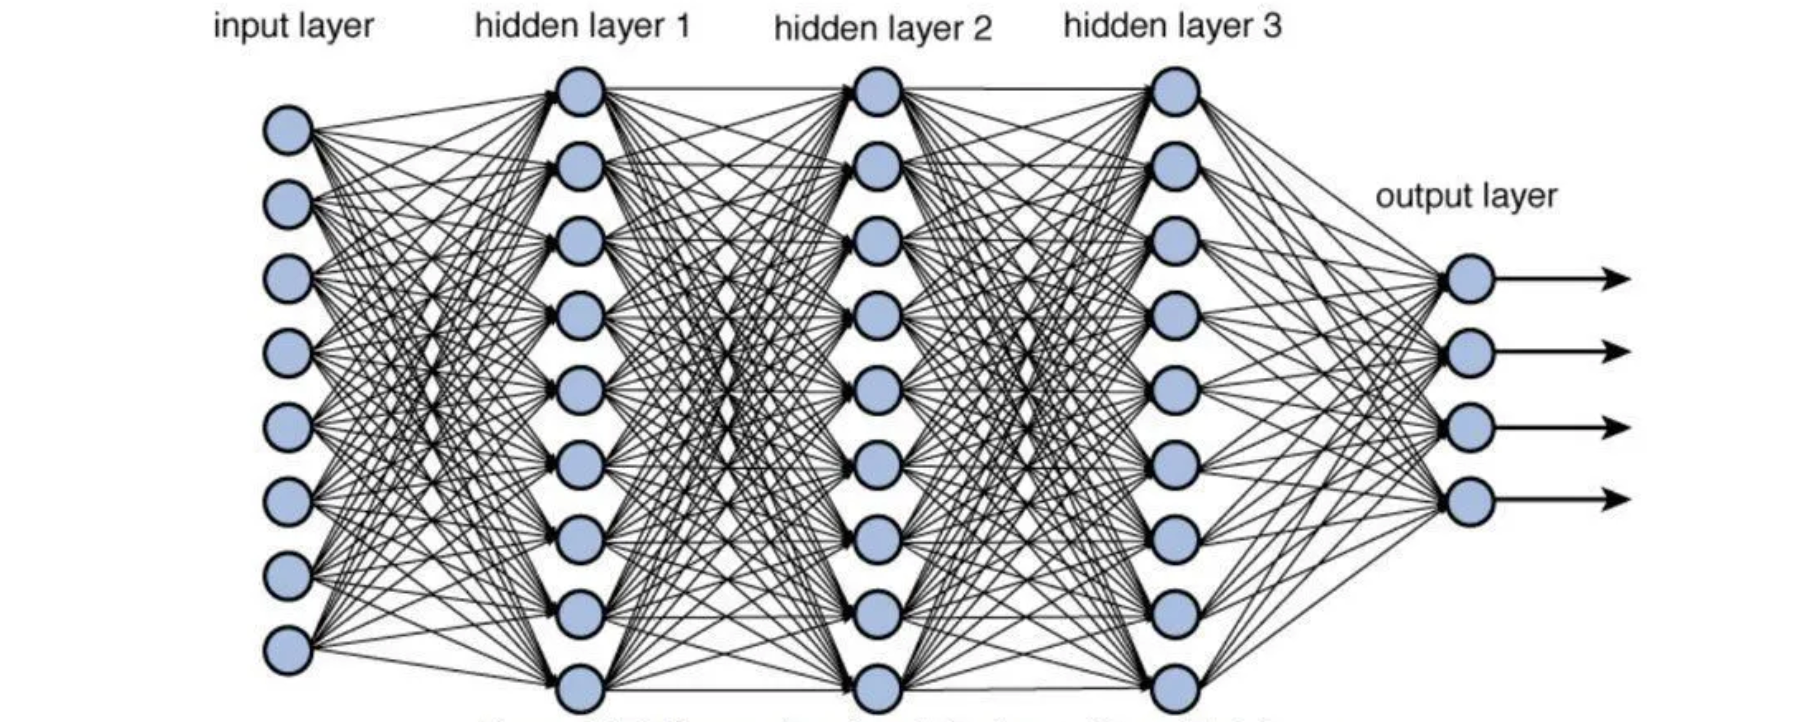

## HEMANT THAPA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics as st
import random
import yfinance as yf
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
class stock:
    def __init__(self, ticker, period):
        self.ticker = ticker
        self.period = period
        
    def chart(self):
        return yf.download(self.ticker, period=self.period)
    
class Plot:
    def __init__(self, X ,y, y_pred):
        self.X = X
        self.y = y
        self.y_pred = y_pred
        
    def linear_predict(self):
        plt.figure(figsize=(15,6))
        plt.scatter(self.X,self.y)
        plt.plot(self.X, self.y_pred, color="red")
        plt.grid(True, linestyle="--", color="grey", alpha=0.5)
        plt.xlabel("Dependent Variables")
        plt.ylabel("Independent Variables")
        plt.show()

In [4]:
X = stock("^GSPC", "3y").chart()
y = stock("MSFT", "3y").chart()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


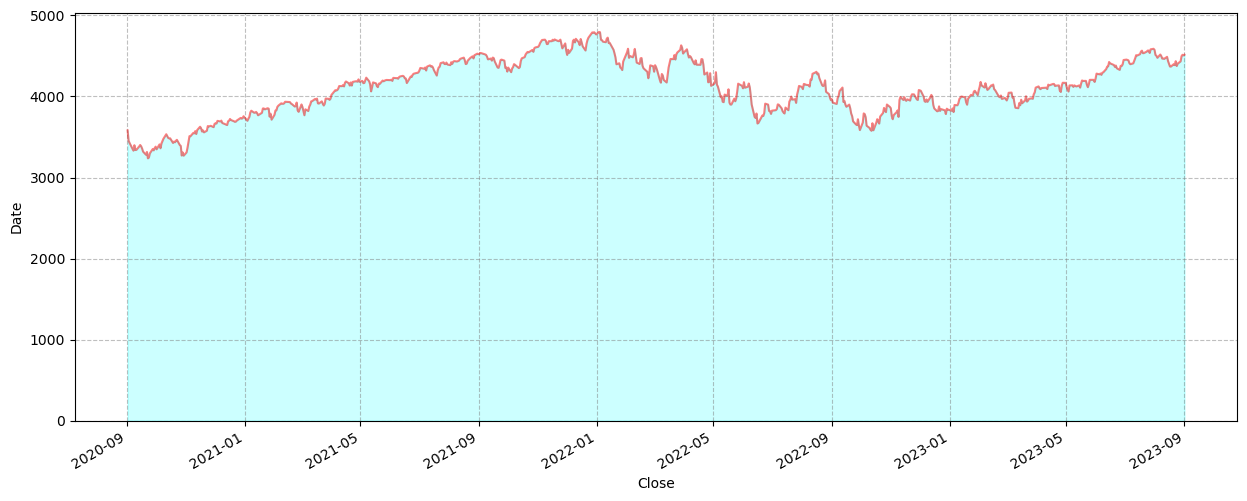

In [5]:
plt.figure(figsize=(15,6))
X.Close.plot(color="red", alpha=0.5)
plt.stackplot(X.index, X.Close, alpha=0.2, color="cyan")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("Close")
plt.ylabel("Date")
plt.show()

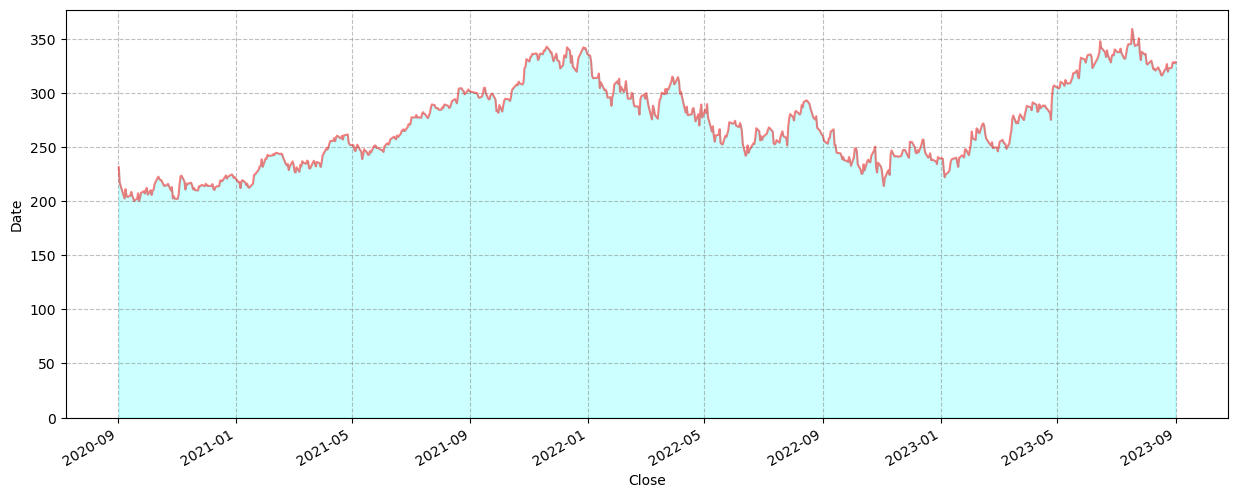

In [6]:
plt.figure(figsize=(15,6))
y.Close.plot(color="red", alpha=0.5)
plt.stackplot(y.index, y.Close, alpha=0.2, color="cyan")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("Close")
plt.ylabel("Date")
plt.show()

In [7]:
dataset = {"X":X.Close.values, "y":y.Close.values}

In [8]:
print(len(dataset['X']))
print(len(dataset['y']))

755
755


In [9]:
df = pd.DataFrame(dataset)

In [10]:
df2 = (df - df.mean()) / df.std()

## STANDARD SCALER

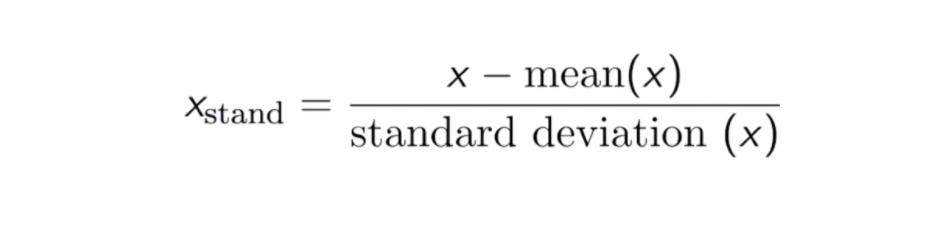

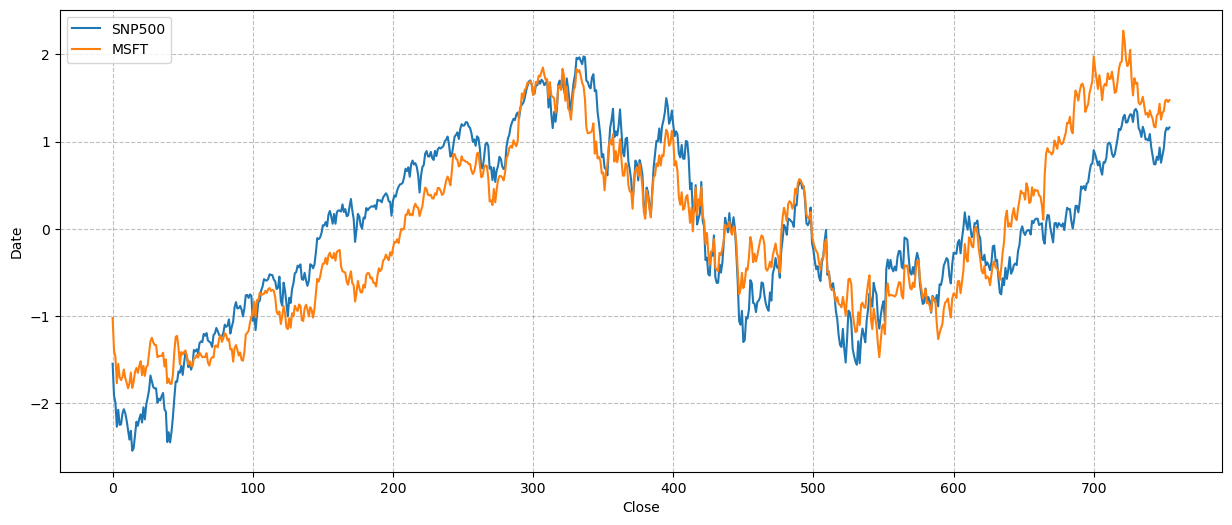

In [11]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df2['X'], label="SNP500")
plt.plot(df.index, df2['y'], label="MSFT")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("Close")
plt.ylabel("Date")
plt.legend()
plt.show()

## MIN MAX SCALER

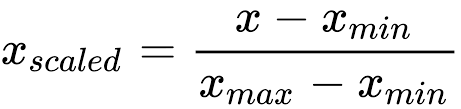

In [12]:
data_scaled = (df - df.min()) / (df.max() - df.min())

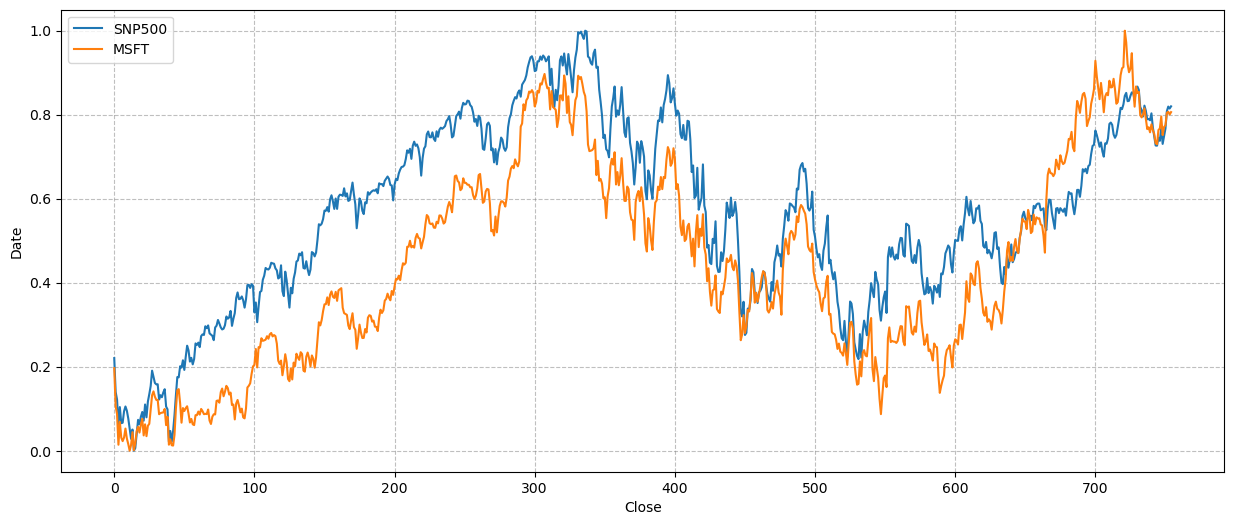

In [13]:
plt.figure(figsize=(15,6))
plt.plot(df.index, data_scaled['X'], label="SNP500")
plt.plot(df.index, data_scaled['y'], label="MSFT")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("Close")
plt.ylabel("Date")
plt.legend()
plt.show()

## ML MODEL 

In [14]:
X = df['X'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)

In [15]:
X.ndim

2

In [16]:
y.ndim

2

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X,y)

LinearRegression()

In [20]:
y_pred = model.predict(X)

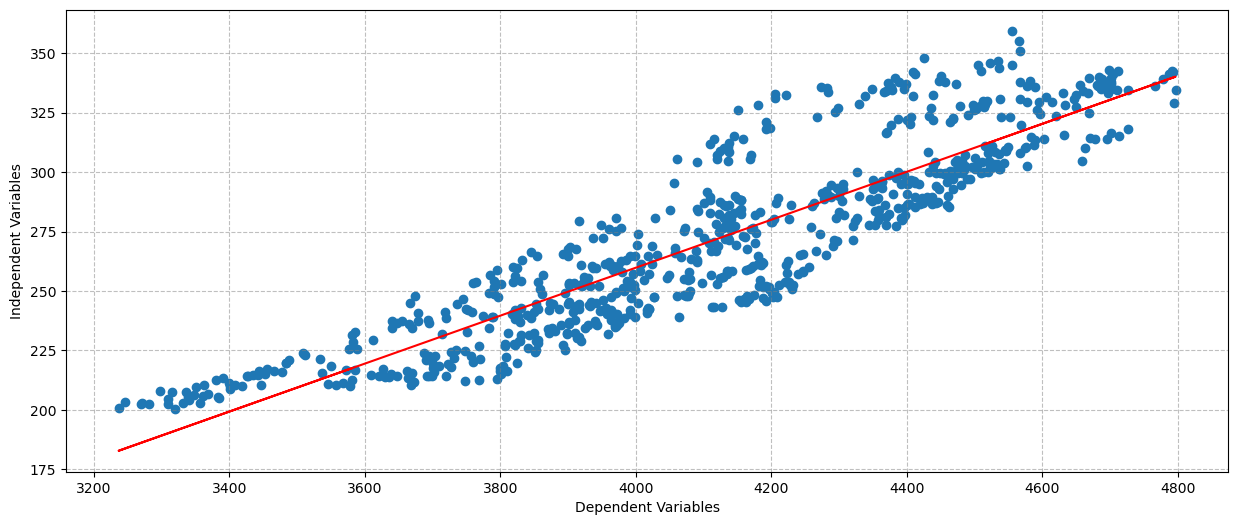

In [21]:
predictions = Plot(X, y, y_pred)
predictions.linear_predict()

In [22]:
rsquare = r2_score(y, y_pred)

In [23]:
rsquare

0.8052328940497752

In [24]:
X = df['X'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)

## DL MODEL 

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X_train_temp, X_test_tf, y_train_temp, y_test_tf = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tf, X_val, y_train_tf, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
scaler

StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train_tf.reshape(-1, 1))
X_val_scaled = scaler.transform(X_val.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test_tf.reshape(-1, 1))

In [29]:
model = Sequential([
    Dense(units=1, input_shape=(1,), activation='linear', use_bias=True)
])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [30]:
history = model.fit(X_train_scaled, 
                    y_train_tf, 
                    validation_data=(X_val_scaled, y_val),
                    epochs=100, verbose=0)

In [31]:
y_pred_tf = model.predict(X_train_scaled)
y_pred_tf[:5]

16/16 [==============================] - 0s 8ms/step


array([[251.05531],
       [267.5209 ],
       [294.40787],
       [253.6138 ],
       [287.94916]], dtype=float32)

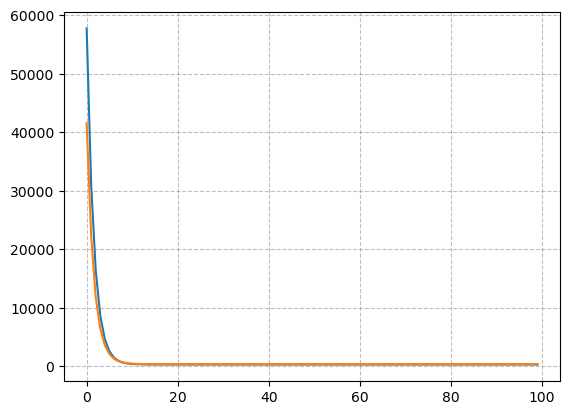

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid(True, linestyle="--", color="grey", alpha=0.5)

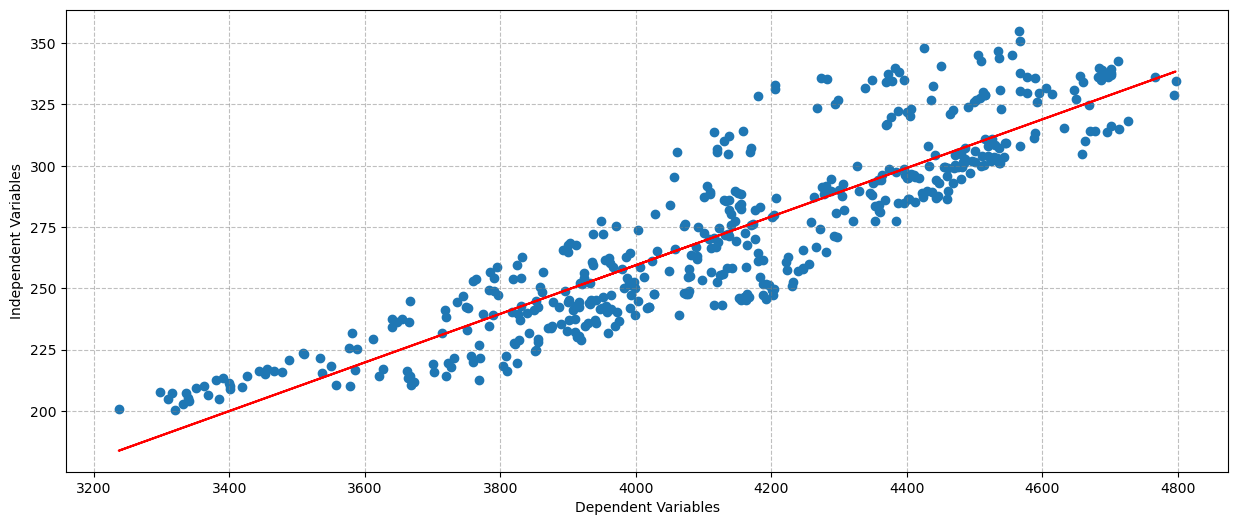

In [33]:
predictions_tf = Plot(X_train_tf,y_train_tf, y_pred_tf)
predictions_tf.linear_predict()

In [34]:
rsquare = r2_score(y_train_tf, y_pred_tf)

In [35]:
print(f"R Square: {rsquare}")

R Square: 0.7981321080649563


## MANUAL CALCULATION 

In [36]:
df['XY'] = df['X'] * df['y']

In [37]:
X_mean = sum(df['X'])/len(df['X'])

In [38]:
X_mean

4114.218147570881

In [39]:
y_mean = sum(df['y'])/len(df['y'])

In [40]:
y_mean

271.2933375074374

In [41]:
df['X square'] = df['X']**2

In [42]:
df['y_square'] = df['y']**2

In [43]:
df['Xi - X mean'] = df['X'] - X_mean
df['yi - y mean'] = df['y'] - y_mean
df['(Xi - X mean)(yi - y mean)'] = df['Xi - X mean'] * df['yi - y mean']
df['(Xi - X mean)**2'] = df['Xi - X mean'] * df['Xi - X mean']

In [44]:
df[:5]

,X,y,XY,X square,y_square,Xi - X mean,yi - y mean,(Xi - X mean)(yi - y mean),(Xi - X mean)**2
0,3580.840088,231.649994,829501.584504,1.282242e+07,53661.719672,-533.378060,-39.643344,21144.889694,284492.154548
1,3455.060059,217.300003,750784.561276,1.193744e+07,47219.291326,-659.158089,-53.993334,35590.143157,434489.386264
2,3426.959961,214.250000,734226.171631,1.174405e+07,45903.062500,-687.258187,-57.043338,39203.500695,472323.815095
3,3331.840088,202.660004,675230.724413,1.110116e+07,41071.077084,-782.378060,-68.633334,53697.214563,612115.428269
4,3398.959961,211.289993,718166.227326,1.155293e+07,44643.461263,-715.258187,-60.003344,42917.883180,511594.273546


In [45]:
b1 = sum(df['(Xi - X mean)(yi - y mean)'])/sum(df['(Xi - X mean)**2'])
b1

0.10092616170363347

In [46]:
bo = y_mean - b1 * X_mean
bo

-143.9389085383247

In [47]:
X_value = df['X']
X_value = X_value.tolist()

In [48]:
predicted_values = [] 

for i in X_value:
    y = bo + b1 * i
    predicted_values.append(y)  

In [49]:
df['y_pred'] = predicted_values

In [50]:
df['residual'] = df['y'] - df['y_pred']

In [51]:
df[:5]

,X,y,XY,X square,y_square,Xi - X mean,yi - y mean,(Xi - X mean)(yi - y mean),(Xi - X mean)**2,y_pred,residual
0,3580.840088,231.649994,829501.584504,1.282242e+07,53661.719672,-533.378060,-39.643344,21144.889694,284492.154548,217.461537,14.188457
1,3455.060059,217.300003,750784.561276,1.193744e+07,47219.291326,-659.158089,-53.993334,35590.143157,434489.386264,204.767042,12.532961
2,3426.959961,214.250000,734226.171631,1.174405e+07,45903.062500,-687.258187,-57.043338,39203.500695,472323.815095,201.931007,12.318993
3,3331.840088,202.660004,675230.724413,1.110116e+07,41071.077084,-782.378060,-68.633334,53697.214563,612115.428269,192.330923,10.329081
4,3398.959961,211.289993,718166.227326,1.155293e+07,44643.461263,-715.258187,-60.003344,42917.883180,511594.273546,199.105074,12.184919


## SST

In [52]:
y_mean = sum(df['y'])/len(df['y'])
X_mean = sum(df['X'])/len(df['X'])
sst = sum([(y - y_mean)**2 for y in df['y']])
print(f'Total Sum of Square: {sst}')

Total Sum of Square: 1136707.7443620877


## SSE

In [53]:
sse = sum((df['residual'])* df['residual'])
print(f'Sum of Square Residual Error: {sse}')

Sum of Square Residual Error: 221393.27768061176


## SSR

In [54]:
df['(y pred - y mean)**2'] = (df['y_pred'] - y_mean)**2
ssr = sum(df['(y pred - y mean)**2'])
print(f'Total Sum of Square Regression: {ssr}')

Total Sum of Square Regression: 915314.4666814746


## R SQUARE 

In [55]:
r_square = ssr/sst
f"R square: {r_square}"

'R square: 0.805232894049774'

In [56]:
r_square = 1 - sse/sst
f"R square: {r_square}"

'R square: 0.8052328940497753'

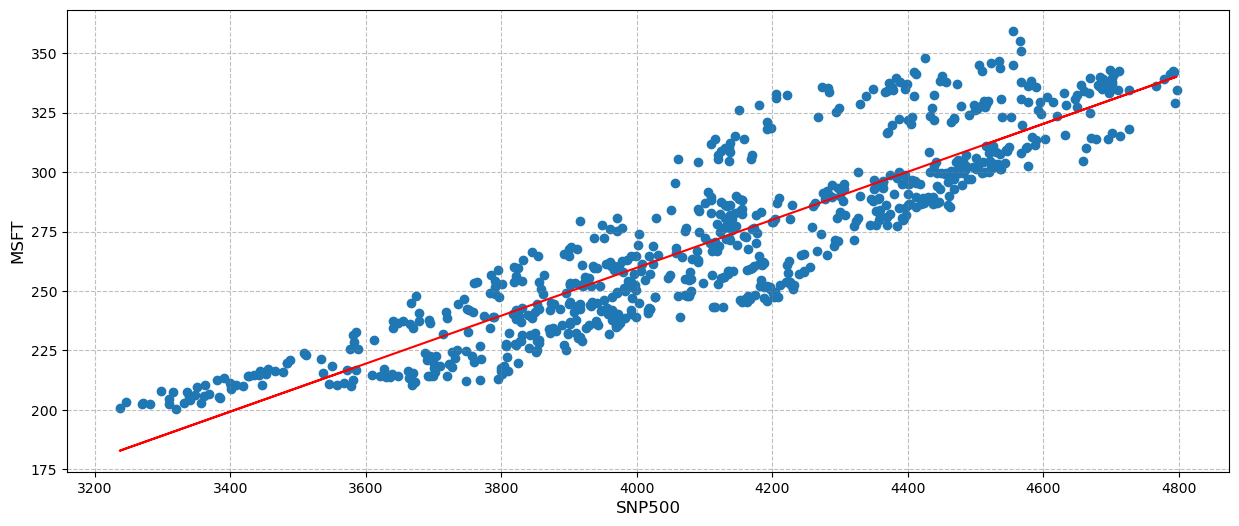

In [57]:
plt.figure(figsize=(15,6))
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['y_pred'], color="red")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("SNP500", fontsize=12)
plt.ylabel("MSFT", fontsize=12)
plt.show()

## BUILDING NEURAL NETWORK

In [58]:
X = yf.download("^GSPC", period="3y")["Close"].to_numpy().reshape(-1, 1)
y = yf.download("MSFT", period="3y")["Close"].to_numpy().reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [60]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=False)


In [61]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases with small random values
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
        
        self.loss_history = []  

    def forward(self, input_data):
        # Hidden layer
        self.hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.hidden_input 
        
        # Output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.output_input  

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, input_data, target, learning_rate):
        error = target - self.output
        
        # Derivatives for the output layer
        delta_output = -error
        d_weights_hidden_output = np.dot(self.hidden_output.T, delta_output)
        d_bias_output = np.sum(delta_output, axis=0, keepdims=True)
        
        # Derivatives for the hidden layer
        delta_hidden = delta_output.dot(self.weights_hidden_output.T)
        d_weights_input_hidden = np.dot(input_data.T, delta_hidden)
        d_bias_hidden = np.sum(delta_hidden, axis=0, keepdims=True)

        # Update weights and biases
        self.weights_hidden_output -= d_weights_hidden_output * learning_rate
        self.bias_output -= d_bias_output * learning_rate
        self.weights_input_hidden -= d_weights_input_hidden * learning_rate
        self.bias_hidden -= d_bias_hidden * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            loss = self.mean_squared_error(y, self.output)
            self.backward(X, y, learning_rate)
            
            self.loss_history.append(loss)  

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
                
    def r_squared(self, y_true, y_pred):
         # Sum of squared residuals
        ssr = np.sum((y_true - y_pred) ** 2) 
        # Total sum of squares
        sst = np.sum((y_true - np.mean(y_true)) ** 2)  
        return 1 - (ssr / sst)

    def predict(self, X):
        self.forward(X)
        return self.output

In [86]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001
epochs = 100

In [87]:
model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Loss: 0.5095


In [88]:
y_pred = model.predict(X_train)
print(y_pred[:5])

[[-0.71600426]
 [ 0.63168704]
 [ 0.03763756]
 [-0.42102067]
 [ 0.71427709]]


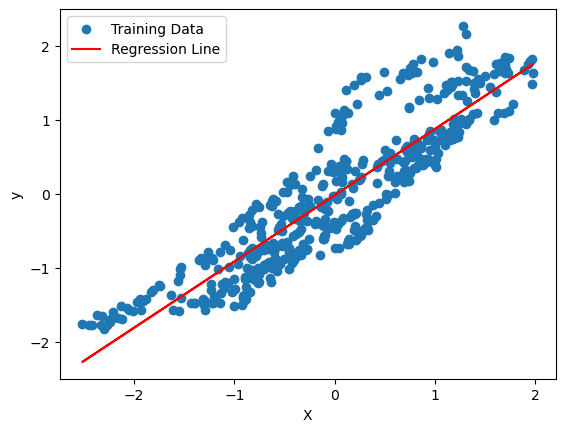

In [89]:
plt.scatter(X_train, y_train, label="Training Data")
plt.plot(X_train, y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

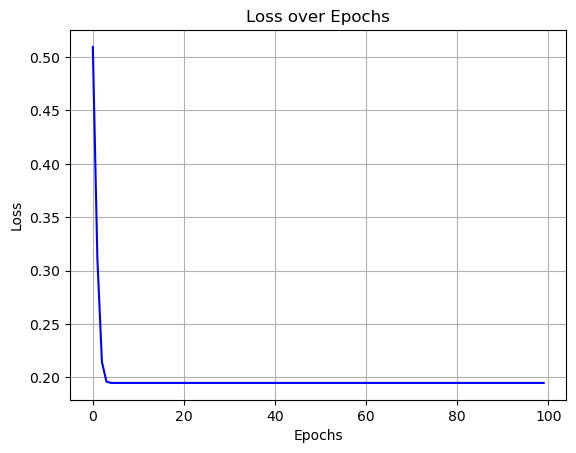

In [90]:
plt.plot(range(epochs), model.loss_history, linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid()
plt.show()

In [91]:
y_pred = model.predict(X_train)

In [92]:
r2_train = model.r_squared(y_train, y_pred)
print(f"R-squared (Training): {r2_train:.4f}")

# Predict on the validation data
y_pred_val = model.predict(X_val)

# Calculate R-squared for the validation data
r2_val = model.r_squared(y_val, y_pred_val)
print(f"R-squared (Validation): {r2_val:.4f}")


R-squared (Training): 0.8037
R-squared (Validation): 0.7900


## REFERENCES:
    
Neural Networks: Forward Pass and Backpropagation
URL: https://towardsdatascience.com/neural-networks-forward-pass-and-backpropagation-be3b75a1cfcc

Everything You Need to Know About Activation Functions in Deep Learning Models
URL: https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253